In [3]:
import numpy as np
import pandas as pd
import timeit
import math
import itertools
import csv
import json

from statistics import mean, stdev

#sklearn
from sklearn import model_selection

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, roc_auc_score,precision_score, accuracy_score


from mrmr import mrmr_classif
from info_gain import info_gain

import seaborn as sns
import matplotlib.pyplot as plt

#external files
import file_operations
import pre_processing
import simple_characteristics
import arfftocsv

In [2]:
def classify(fileName, X,Y):
    
    result = []
    importance = []
    estimators = []
    model11 = LogisticRegression(penalty = 'l2', random_state = 0)
    estimators.append(('lr',model11))
    model16 = DecisionTreeClassifier(max_depth = 3)
    estimators.append(('dt',model16))
    model26 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
    estimators.append(('knn1', model26))
    model31 = GaussianNB()
    estimators.append(('nbs1', model31))

    ensemble = VotingClassifier(estimators, voting='soft')    
    temp=[]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
    start1 = timeit.default_timer()
    ensemble.fit(X_train, y_train)
    y_pred = ensemble.predict(X_test)
    stop1 = timeit.default_timer()
    pre_sc_macro = precision_score(y_test, y_pred, average='macro')
    recal_sc_macro = recall_score(y_test, y_pred, average='macro')  
    pre_sc_weigh = precision_score(y_test, y_pred, average='weighted')
    recal_sc_weigh = recall_score(y_test, y_pred, average='weighted')  
    temp.append(fileName)
    temp.append(ensemble.score(X_test,y_test))
    temp.append(pre_sc_macro)
    temp.append(recal_sc_macro)
    temp.append(pre_sc_weigh)
    temp.append(recal_sc_weigh)
    temp.append(stop1-start1)
    temp.append(simple_characteristics.class_index)
    result.append(temp)
    return result #returns mean accuracy

In [4]:
timeRequired = []
listofFiles={}
classification_perfomance=[[]]
#featureAlgo = ["MI"]

listofFiles={}
abs_path = os.getcwd()+'/datasets/MFEAI/All feature/'
file_operations.un_zip_files(abs_path) #extracted zipped files
arfftocsv.arffTocsv(abs_path)
test = 'test'
train = 'train'
valid = 'valid'
flag=0
count = 0
duplicate_files = []
for path, subdirs, files in os.walk(abs_path):
    
    duplicate_files = []
    test_datasets = [s for s in files if test in s]
    train_datasets = [s for s in files if train in s]
    valid_datasets = [s for s in files if valid in s]
    if train_datasets:
        for td in train_datasets:
            pre_train = (td).split("_")[0]
            for ted in test_datasets:
                pre_test = (ted).split("_")[0]
                if(pre_train in ted) and (pre_test==pre_train):
                    table1 = pd.read_csv(path+"/"+td)
                    table2 = pd.read_csv(path+"/"+ted)
                    table1.columns = table2.columns
                    data = table1.append(table2)
                    data.to_csv(path+"/"+pre_train+".csv")
                    if flag:
                        files.append(pre_train+".csv")
                    else:
                        flag=1
                        files=[pre_train+".csv"]
    base = [os.path.splitext(f) for f in files]
    if(base):
        for a, b in itertools.combinations(base, 2):
            if(a[0]==b[0]):
                if((a[1]==".csv" and b[1]==".xlsx") or
                   (b[1]==".csv" and a[1]==".xlsx") or
                   (a[1]==".arff" and b[1]==".xlsx") or
                   (b[1]==".arff" and a[1]==".xlsx") or 
                   (a[1]==".arff" and b[1]==".csv") or
                   (b[1]==".arff" and a[1]==".csv") or 
                   (a[1]==".data" and b[1]==".csv") or
                   (b[1]==".data" and a[1]==".csv")):
                   duplicate_files.append(a[0]+".csv")

    if(duplicate_files):
        files = duplicate_files

    for name in files:
        if name.endswith((".data", ".csv", ".xlsx",".xls", ".asc",".dat",".trn")):
            listofFiles[name]=os.path.join(path, name)
           # print(listofFiles[name])

# create the inputs and outputs
classification_perfomance = []

for eachFile in listofFiles:
    print(eachFile)
    print("***************************TOTAL FILES*********************************", count)
    count+=1
    print("----------------------")
    dataset = file_operations.custom_csv(listofFiles[eachFile])
    all_Label = simple_characteristics.get_labels(dataset)

    dataset = pre_processing.drop_rows(dataset)
    dataset = pre_processing.drop_columns(dataset)
    dataset = pre_processing.convert_NAs(dataset)
    dataset = pre_processing.convert_str_int_categorical(dataset)
    dataset = pre_processing.convert_str_int_nominal(dataset)
    X,y = simple_characteristics.get_XY(dataset)
    classification_output = classify(eachFile, X,y)
    for item in classification_output:
        classification_perfomance.append(item)
df=pd.DataFrame(classification_perfomance)
#df.columns = ['File', 'FeatureAlgo', 'Features']
df.columns =['File', 'Accuracy','Precision macro' ,'Recall macro', 'Precision weight', 'Recall weight', 'Time ensemble','class index']
df.to_csv("df_withoutFS.csv",index=False)

wine.data
***************************TOTAL FILES********************************* 0
----------------------
adult.csv
***************************TOTAL FILES********************************* 1
----------------------
iris0.csv
***************************TOTAL FILES********************************* 2
----------------------
TUANDROMD.csv
***************************TOTAL FILES********************************* 3
----------------------
ionosphere-5cn01-n.csv
***************************TOTAL FILES********************************* 4
----------------------
appendicitis.csv
***************************TOTAL FILES********************************* 5
----------------------
Indian Liver Patient Dataset (ILPD).csv
***************************TOTAL FILES********************************* 6
----------------------
glass2.csv
***************************TOTAL FILES********************************* 7
----------------------
pageblocks5cn01-nc.csv
***************************TOTAL FILES****************************

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


connect-4.data
***************************TOTAL FILES********************************* 73
----------------------
ecoli.data
***************************TOTAL FILES********************************* 74
----------------------
bloodtransfusion.data
***************************TOTAL FILES********************************* 75
----------------------
Autism-Adolescent-Data.csv
***************************TOTAL FILES********************************* 76
----------------------
chesskr-vs-kp.data
***************************TOTAL FILES********************************* 77
----------------------
thyroid5cn21.csv
***************************TOTAL FILES********************************* 78
----------------------
creditapprovallimits.data
***************************TOTAL FILES********************************* 79
----------------------
starlog_australian.dat
***************************TOTAL FILES********************************* 80
----------------------
breastcancerimbalance.csv
***************************TOT

## Comparison

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df_with_FSA =pd.read_csv("df_ensemble_allfeatures.csv")
df_without_FSA =pd.read_csv("df_withoutFS.csv")

In [18]:
df_with_FSA.columns

Index(['File', 'FeatureAlgo', 'Accuracy', 'Precision macro', 'Recall macro',
       'Precision weight', 'Recall weight', 'Time FS', 'Features',
       'Time ensemble', 'class index'],
      dtype='object')

In [19]:
df_without_FSA.columns

Index(['File', 'Accuracy', 'Precision macro', 'Recall macro',
       'Precision weight', 'Recall weight', 'Time ensemble', 'class index'],
      dtype='object')

In [20]:
def avg_accuracies(group):
    top_3_accuracies = group['Accuracy'].nlargest(3)
    return top_3_accuracies.mean()

df_withFSA_Accuracy = df_with_FSA.groupby('File').apply(avg_accuracies).reset_index()
df_withFSA_Accuracy.columns = ['File', 'Accuracy']

df_withoutFSA_Accuracy = df_without_FSA[['File', 'Accuracy']]
merged_df = pd.merge(df_withFSA_Accuracy, df_withoutFSA_Accuracy, on='File', suffixes=('_df1', '_df2'))

merged_df['Accuracy_Difference'] = merged_df['Accuracy_df1'] - merged_df['Accuracy_df2']

In [21]:
#Check for normality of the data; because samples are >50, K-S test is
from scipy.stats import kstest

# Kolmogorov-Smirnov Test
ks_stat, ks_p = kstest(merged_df['Accuracy_Difference'], 'norm', args=(merged_df['Accuracy_Difference'].mean(), merged_df['Accuracy_Difference'].std()))
print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat}, p-value={ks_p}")

Kolmogorov-Smirnov Test: Statistic=0.20108588992772114, p-value=1.3128168737274218e-06


In [26]:
#Because the p-value of K-S test is much less than 0.05, data is not normally distributed. Hence  Wilcoxon signed-rank test is applied

from scipy.stats import wilcoxon

w_stat, w_p_value = wilcoxon(merged_df['Accuracy_df1'], merged_df['Accuracy_df2'])

print(f"Wilcoxon signed-rank test: Statistic={w_stat}, p-value={w_p_value}")

alpha = 0.05
if w_p_value < alpha:
    print("The difference in accuracies is statistically significant.")
else:
    print("The difference in accuracies is not statistically significant.")

Wilcoxon signed-rank test: Statistic=2835.5, p-value=1.1318254440090377e-07
The difference in accuracies is statistically significant.


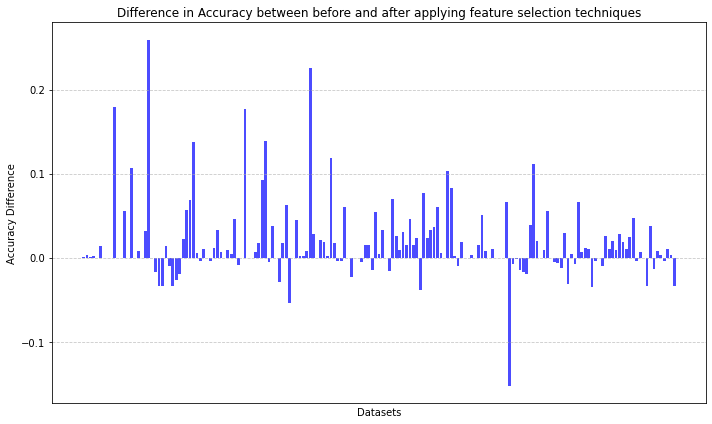

In [16]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(merged_df['File'], merged_df['Accuracy_Difference'], color='blue', alpha=0.7)

plt.xlabel('Datasets')
plt.ylabel('Accuracy Difference')
plt.title('Difference in Accuracy between before and after applying feature selection techniques')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks([])

plt.tight_layout()
plt.show()

In [23]:
sum(merged_df['Accuracy_Difference'] > 0)

103

In [24]:
sum(merged_df['Accuracy_Difference'] == 0)

23

In [25]:
sum(merged_df['Accuracy_Difference'] < 0)

47